<a href="https://colab.research.google.com/github/swarna987456/MTech_Final_Project/blob/main/MTech_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Data Preparation**


### **Import the data from kaggle**

The following data is taken from kaggle: [Source](https://www.kaggle.com/datasets/aviskumar/automatic-ticket-assignment-using-nlp).
Let's import required packages for data preparation








In [ ]:
# Kaggle API
!pip install kaggle -q

# File handling and data manipulation
import zipfile
import pandas as pd
from google.colab import files
import pickle
import warnings
warnings.filterwarnings('ignore')


# Numerical computation
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and NLP
import re
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

from tqdm import tqdm #to show progress bar

!pip install googletrans==3.1.0a0 -q #for translation
from googletrans import Translator

!pip install pyspellchecker -q #for spelling check and correction
from spellchecker import SpellChecker

!pip install spacy -q #spacy for lemmatization
import spacy
!python -m spacy download en_core_web_sm -q

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencie

Let's download the data from Kaggle using the API, unzip it, and create a Pandas DataFrame to begin the data cleaning process.

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

dataset_name = 'aviskumar/automatic-ticket-assignment-using-nlp'

# Download the dataset
!kaggle datasets download -d {dataset_name}


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/aviskumar/automatic-ticket-assignment-using-nlp
License(s): unknown
100% 975k/975k [00:00<00:00, 1.02MB/s]
100% 975k/975k [00:00<00:00, 1.02MB/s]


In [ ]:
# Unzip the dataset
with zipfile.ZipFile(dataset_name.split('/')[-1]+'.zip', 'r') as zip_ref:
  zip_ref.extractall()

# Remove the zip file
!rm {dataset_name.split('/')[-1]}.zip

In [ ]:
data = pd.read_excel('Automatic Ticket Assignment.xlsx')

In [ ]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Observation**: Dataset contains total of four columns with 8500 tickets data, seems there are some null values in Description and short description fields, we will check them later on.

### **Removing Duplicate**

In [ ]:
data.duplicated().sum()

83

**Observation:** There are 83 duplicates tickets found in our dataset, so we need to remove them to avoid data redundacy.

In [ ]:
data.drop_duplicates(ignore_index = True, inplace = True)

Let's check the ticket distribution over the assignment groups

In [ ]:
data['Assignment group'].value_counts(normalize = True)

,proportion
Assignment group,
GRP_0,0.467387
GRP_8,0.076631
GRP_24,0.033860
GRP_12,0.030533
GRP_9,0.029939
...,...
GRP_67,0.000119
GRP_70,0.000119
GRP_35,0.000119


In [ ]:
(data['Assignment group'].value_counts(normalize = True)*100).rename('percentage of tickets')

,percentage of tickets
Assignment group,
GRP_0,46.738743
GRP_8,7.663063
GRP_24,3.386005
GRP_12,3.053344
GRP_9,2.993941
...,...
GRP_67,0.011881
GRP_70,0.011881
GRP_35,0.011881


<Axes: xlabel='Assignment group'>

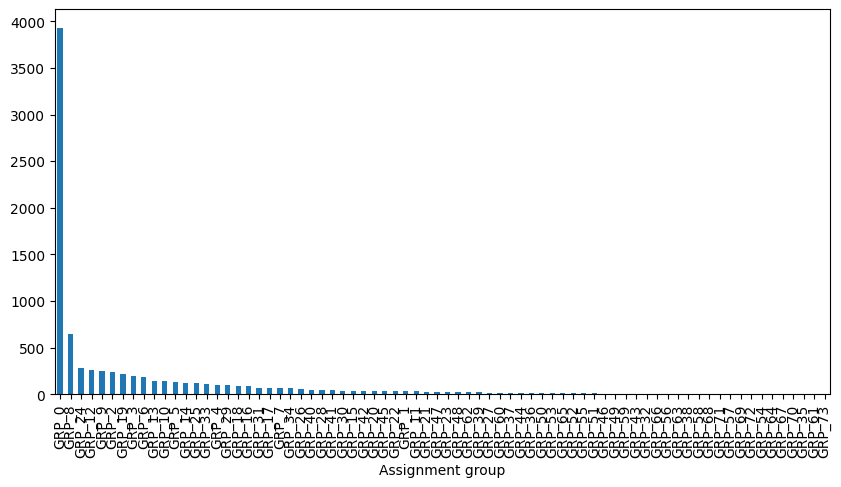

In [ ]:
plt.figure(figsize = (10,5))
data['Assignment group'].value_counts().plot(kind = 'bar')

In [ ]:
data['Assignment group'].value_counts()[data['Assignment group'].value_counts() == 1]

,count
Assignment group,
GRP_64,1
GRP_67,1
GRP_70,1
GRP_35,1
GRP_61,1
GRP_73,1


### **Assignment Group Imbalance and Skew Analysis**

**Observation**:


*   74 Unique assignment groups were observed and most of the tickets(~46%) are belonged to Group_0, Data is imbalance and skewed towards Group0.
*   Also, There are few groups having only one ticket assigned


**Solution**: We will remove assignemnt group with less than 100 tickets to improve model performance and avoid over fitting. With too few examples, the model might not generalize well and could lead to inaccurate predictions for underrepresented groups, also when a group has very few samples, the model might overfit to those specific examples, learning noise rather than generalizable patterns. This can lead to poor performance on unseen data.



In [ ]:
assignment_group_less_100 = data['Assignment group'].value_counts()[data['Assignment group'].value_counts() < 100]
print(data['Assignment group'].nunique())
print(len(assignment_group_less_100))
print(assignment_group_less_100)

74
58
Assignment group
GRP_29    97
GRP_18    88
GRP_16    85
GRP_31    69
GRP_17    68
GRP_7     68
GRP_34    62
GRP_26    56
GRP_40    45
GRP_28    44
GRP_41    40
GRP_30    39
GRP_15    38
GRP_42    37
GRP_20    36
GRP_45    35
GRP_22    31
GRP_1     31
GRP_11    30
GRP_21    28
GRP_47    27
GRP_23    25
GRP_48    25
GRP_62    25
GRP_39    19
GRP_27    18
GRP_60    16
GRP_37    16
GRP_44    15
GRP_36    15
GRP_50    14
GRP_53    11
GRP_65    11
GRP_52     9
GRP_55     8
GRP_51     8
GRP_46     6
GRP_49     6
GRP_59     6
GRP_43     5
GRP_32     4
GRP_66     4
GRP_56     3
GRP_63     3
GRP_38     3
GRP_58     3
GRP_68     3
GRP_71     2
GRP_57     2
GRP_69     2
GRP_72     2
GRP_54     2
GRP_64     1
GRP_67     1
GRP_70     1
GRP_35     1
GRP_61     1
GRP_73     1
Name: count, dtype: int64


In [ ]:
assignment_group_less_100.values.sum()

1351

In [ ]:
data_modified = data.copy()

In [ ]:
data_modified['Assignment group'] = data['Assignment group'].apply(lambda x:'other_group' if x in assignment_group_less_100.index.values else x)

In [ ]:
data_modified['Assignment group'].nunique()

17

In [ ]:
df1 = data_modified[data_modified['Assignment group']!='other_group'].copy()
df1.reset_index(drop = True, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  7059 non-null   object
 1   Description        7065 non-null   object
 2   Caller             7066 non-null   object
 3   Assignment group   7066 non-null   object
dtypes: object(4)
memory usage: 220.9+ KB


In [ ]:
df1['Assignment group'].nunique()

16

<Axes: xlabel='Assignment group'>

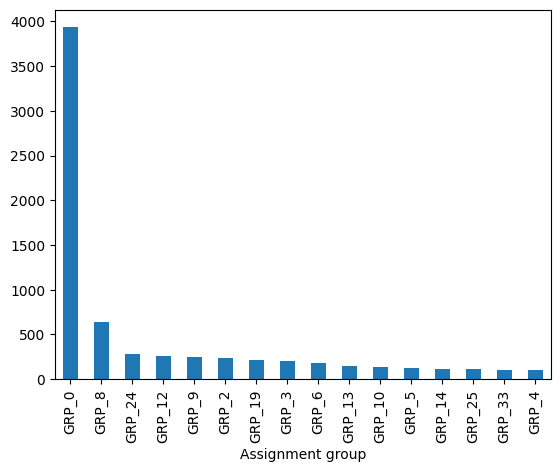

In [ ]:
df1['Assignment group'].value_counts().plot(kind = 'bar')

After compressing assignment group to less, final dataset1 contains 16 assignment groups with total of 7066 rows(tickets)

In [ ]:
df1

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
7061,hr_tool etime option not visitble,hr_tool etime option not visitble,tmopbken ibzougsd,GRP_0
7062,"erp fi - ob09, two accounts to be added","i am sorry, i have another two accounts that n...",ipwjorsc uboapexr,GRP_10
7063,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3
7064,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0


### **Column Names Standardization & Pruning**

Column names are not in standard form, so we will standardized the column names by converting them to lowercase and combining words with underscores. Additionally, removed the "Caller" column as it does not provide any useful information for modeling.

In [ ]:
columns = {'Short description':'short_description','Description':'long_description','Assignment group':'assignment_group'}
df1.rename(columns = columns,inplace = True)

In [ ]:
df1.drop('Caller',axis = 1,inplace = True)

In [ ]:
df1.head()

,short_description,long_description,assignment_group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


### **Duplicate Description Rows Identification and filtering**

Let's check if there is any redundacy in short and long descriptions for each ticket

In [ ]:
df1.shape

(7066, 3)

In [ ]:
short_long_descriptions_redundancy = df1[df1['short_description'] == df1['long_description']]
short_long_descriptions_redundancy

,short_description,long_description,assignment_group
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0
7,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
...,...,...,...
7060,account locked,account locked,GRP_0
7061,hr_tool etime option not visitble,hr_tool etime option not visitble,GRP_0
7063,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...,GRP_3
7064,telephony_software issue,telephony_software issue,GRP_0


In [ ]:
print('Total number of rows', df1.shape[0])
print('rows where the Short description and long Description columns have the same content',short_long_descriptions_redundancy.shape[0])

Total number of rows 7066
rows where the Short description and long Description columns have the same content 2628


In [ ]:
(2628/7066)*100

37.192187942258705

**Observation:** 37% of the tickets contain the same content in both their short and long descriptions. To avoid duplicate and redundant data in modeling, we need to replace the short descriptions with a space when they match the long descriptions.

In [ ]:
df1.loc[short_long_descriptions_redundancy.index, 'short_description'] = ' '

In [ ]:
df1[df1['short_description'] == df1['long_description']]

,short_description,long_description,assignment_group


### **Handling Missing Data**

In [ ]:
df1.isnull().sum().rename('null-value count')

,null-value count
short_description,7
long_description,1
assignment_group,0


In [ ]:
#lets observe null values
mask = df1.isnull()
df1[mask.any(axis = 1)]

,short_description,long_description,assignment_group
2859,NaN,_x000D_\n-connected to the user system using t...,GRP_0
3285,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3288,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3292,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3298,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3301,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
3648,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,GRP_0
3693,i am locked out of skype,NaN,GRP_0


**Observation:** In our dataset, null values were found in both the short and long descriptions, but they were minimal. Instead of removing those rows completely, we will impute the null values with a space in our ticket data.

In [ ]:
df1.fillna(' ',inplace = True)

In [ ]:
df1.isnull().sum().rename('blank/null values')

,blank/null values
short_description,0
long_description,0
assignment_group,0


### **Merging Descriptions into a Single Field**

We will combine both short and long descriptions into a single column as ‘description’. This is to simplify text preprocessing and we can apply text cleaning techiniques once, rather than separately for each description type going forward.

In [ ]:
df1['description'] = df1['short_description']+' '+df1['long_description']

In [ ]:
df1 = df1.drop(['short_description','long_description'],axis = 1)

In [ ]:
df1.head()

,assignment_group,description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,GRP_0,unable to access hr_tool page
4,GRP_0,skype error


In [ ]:
def merge_descriptions(df):

  df['description'] = df['short_description'] + ' ' + df['long_description']
  df = df.drop(['short_description', 'long_description'], axis=1)
  return df

In [ ]:
df1 = merge_descriptions(df1)

In [ ]:
df1.head()

,assignment_group,description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,GRP_0,unable to access hr_tool page
4,GRP_0,skype error


Now our data is ready for further text cleaning [on description column]

# **Text Cleaning - Preprocessing**

Let's observe the text data

In [ ]:
df1

,assignment_group,description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,GRP_0,unable to access hr_tool page
4,GRP_0,skype error
...,...,...
7061,GRP_0,hr_tool etime option not visitble
7062,GRP_10,"erp fi - ob09, two accounts to be added i am ..."
7063,GRP_3,tablet needs reimaged due to multiple issues...
7064,GRP_0,telephony_software issue


In [ ]:
df1.sample(5)

,assignment_group,description
5351,GRP_0,there were 3 undeliverable e-mails returned wi...
81,GRP_6,job apo_bop_plant_283a failed in job_scheduler...
3194,GRP_0,require new driver for local printer.
2736,GRP_0,reset the password for qekdgaim wagshrzl on er...
5412,GRP_8,job Job_3049 failed in job_scheduler at: 08/24...


In [ ]:
df1.tail(5)

,assignment_group,description
7061,GRP_0,hr_tool etime option not visitble
7062,GRP_10,"erp fi - ob09, two accounts to be added i am ..."
7063,GRP_3,tablet needs reimaged due to multiple issues...
7064,GRP_0,telephony_software issue
7065,GRP_0,vip2: windows password reset for tifpdchb pe...


In [ ]:
df1[df1['description'].str.contains('\n|\x000d')]

,assignment_group,description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
15,GRP_0,unable to login to company vpn \n\nreceived fr...
20,GRP_0,vpn issue _x000D_\n_x000D_\nreceived from: uge...
...,...,...
7052,GRP_9,ess portal \n\nreceived from: eagvusbr.nguqity...
7054,GRP_0,fw: case id [ref:_case-111121032:ref] :: other...
7058,GRP_3,telephony_software is missing from pc pc recei...
7059,GRP_0,erp account unlock name:mfeyouli ndobtzpw\nlan...


**Other Language Detected (along with English)**

In [ ]:
translator = Translator()
# Example
text = "anzeigen der bestellã¼bersicht im erp netweaver portal nicht mã¶glich im erp netweaver portal ist es nicht mehr mã¶glich unter dem paramdntyeter 'feinnavigation' die bestellã¼bersicht aufzurufen._x000d_ siehe angefã¼gte screenshots"
detected = translator.detect(text)
translated = translator.translate(text, dest='en')
print(f"Detected language: {detected.lang}")
print(f"Translated text: {translated.text}")


Detected language: de
Translated text: Displaying the order overview in the erp netweaver portal is no longer possible in the erp netweaver portal it is no longer possible to call up the order overview under the paramdntyeter 'fine navigation'._x000d_ see attached screenshots


**"de" stands for German in Google Translate's detected language.**

In [ ]:
#numbers presented in each group
df1[df1['description'].str.contains(r'\d')].assignment_group.value_counts()

,count
assignment_group,
GRP_0,1895
GRP_8,641
GRP_9,238
GRP_12,230
GRP_2,190
GRP_6,182
GRP_19,134
GRP_10,133
GRP_13,133


**Observations from descriptions:**

1.	The data contains both uppercase and lowercase letters.
2.	Descriptions frequently include carriage return (\x000d) and newline (\n) characters, which can disrupt text flow.
3.	While the majority of descriptions are in English, some contain text in other languages, such as German.
4. The data contains a variety of special characters, including non-ASCII characters, punctuation marks, and symbols. These characters can interfere with text processing and analysis.
5. Some descriptions include masked email addresses and user names, such as masked_id@company.com, masked_id@gmail.com, firstname.lastname@gmail.com, were found in the data.
6. A small number of descriptions contain references to image attachments.
7. Some of the descriptions include numbers, dates, and times.
8. Certain words, such as greetings, 'received,' 'from,' 'hi,' 'hello,'please,' 'emailto,' 'kind,' and 'kindly' has found and need to be removed from descriptions to simplify the text and eliminate unnecessary complexity.


## Text Cleaning Steps1:

In [ ]:
text = df1.loc[50, 'description']
print(text)
print("********************")
text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', ' ',text)
print(text)


reset scm_software password 

received from: cdbaoqts.wqbsodni@gmail.com

hello,

please reset my scm_software password.


cdbaoqts wqbsodni
global product manager, markhtyeting initiatives
cdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>






********************
reset scm_software password 

received from:  

hello,

please reset my scm_software password.


cdbaoqts wqbsodni
global product manager, markhtyeting initiatives
 <mailto: >








In [ ]:
text = df1.loc[1, 'description']
print(text)
print("********************")
text = re.sub(r'\S+\.\S+@gmail\.com', ' ',text)
print(text)

outlook _x000D_
_x000D_
received from: hmjdrvpb.komuaywn@gmail.com_x000D_
_x000D_
hello team,_x000D_
_x000D_
my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_
_x000D_
kind 
********************
outlook _x000D_
_x000D_
received from:  _x000D_
_x000D_
hello team,_x000D_
_x000D_
my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_
_x000D_
kind 


In [ ]:
words_to_remove = ['received',
 'from',
 'hi',
 'hello',
 'please',
 'emailto',
 'kind',
 'kindly',
 'help']

In [ ]:
def text_cleaning_steps_1(text):
  text = text.lower()
  translated = translator.translate(text, src='de', dest='en')#translating from German to English
  text = translated.text
  text = text.replace('x000d',' ')
  text = text.replace('\n',' ')
  text = text.replace('â€',' ')
  text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', ' ',text) #General pattern to remove any email address
  text = re.sub(r'\S+\.\S+@gmail\.com', ' ', text) # Specific pattern to remove emails like "something.something@gmail.com"
  text = re.sub(r'\[\s*cid:[^\]]+\]',' ',text) #images pattern
  text = re.sub(r'\d+', ' ', text) # removing numbers
  text = re.sub(r"[^\w\s']", ' ', text) # removing special characters except '(apostrophe, to not to breaks words don't, won't etc meaning)
  text = text.encode("ascii", "ignore").decode() # removing non-ascii characters
  text = ' '.join([word for word in text.split() if word not in words_to_remove]) #removing few words
  text = re.sub(r"[^a-zA-Z0-9\s]", ' ', text) #removing puntuations
  text = text.strip()

  return text

In [ ]:
#Testing above function on index 2790

print(df1['description'][2790])
print("*******")
new_text=  text_cleaning_steps_1(df1['description'][2790])
print(new_text)


anzeigen der bestellÃ¼bersicht im erp netweaver portal nicht mÃ¶glich im erp netweaver portal ist es nicht mehr mÃ¶glich unter dem paramdntyeter "feinnavigation" die bestellÃ¼bersicht aufzurufen._x000D_
siehe angefÃ¼gte screenshots
*******
Displaying the order overview in the erp netweaver portal is no longer possible in the erp netweaver portal it is no longer possible to call up the order overview under the paramdntyeter fine navigation     see attached screenshots


In [ ]:
for i in tqdm(range(len(df1))):
  df1.loc[i,'description_cleaned'] = text_cleaning_steps_1(df1['description'].iloc[i])

100%|██████████| 7066/7066 [14:58<00:00,  7.86it/s]


In [ ]:
df1.head()

,assignment_group,description,description_cleaned
0,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee man...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook team my meetin...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn hi i...
3,GRP_0,unable to access hr_tool page,unable to access hr tool page
4,GRP_0,skype error,skype error


Cleaning steps:

1. **Lowercase conversion:** Convert all text to lowercase for consistent analysis.
2. **Line break removal:** Replace carriage return (`\x000d`) and newline (`\n`) characters with spaces for smoother text flow.
3. **Language translation:** Translate non-English descriptions (e.g., German) to English for consistency.
4. **Special character removal:** Remove non-ASCII characters, punctuation marks, and other special characters using regular expressions.
5. **Masked user information replacement:** Replace masked email addresses and potentially identifiable names with spaces.
6. **Image reference removal:** Remove references to image attachments (JPG, PNG) as they are not text data.
7. **Numeric and temporal data removal:** Remove numbers, dates, and times since they might not be relevant to the analysis.
8. **Stop word removal:** Remove common words like greetings ("hi", "hello"), prepositions ("from", "to"), and courtesy terms ("please", "kindly") to simplify the text.


In [ ]:
special_chars = set()
for text in df1['description_cleaned']:
  for char in text:
    if not char.isalnum() and not char.isspace():
      special_chars.add(char)

print(special_chars)


set()


In [ ]:
numbers_exist = df1['description_cleaned'].str.contains(r'\d').any()

if numbers_exist:
  print("Numbers are present")
  number_counts = df1['description_cleaned'].str.findall(r'\d+').explode().value_counts()
  print("Count of each number:")
  print(number_counts)
else:
  print("No numbers found ")


No numbers found 


## Text Cleaning Steps2:

### Lemmatization

**Lemmatization**: As part of text cleaning process for modeling, we need to perform lemmatization techniques on the text data.

It is the process of reducing a word to its base or root form, called a "lemma." This is different from stemming, which simply cuts off word endings. Lemmatization considers the word's meaning and context to find the correct base form.

**Why is lemmatization important?**

* **Reduces redundancy:** It groups different forms of a word together, making the data less messy.
* **Improves accuracy:** By standardizing words, it helps in tasks like classifying text or finding information.
* **Better understanding:** Lemmatization understands the word's meaning and context, which is often better than stemming, especially for complex language tasks.
* **Reduces complexity:** It simplifies the data by converting words to their root forms, making it easier to process.



In [ ]:
df1.head()

,assignment_group,description,description_cleaned
0,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee man...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook team my meetin...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn hi i...
3,GRP_0,unable to access hr_tool page,unable to access hr tool page
4,GRP_0,skype error,skype error


In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    lemmas = []
    for token in nlp(text):
        if token.text.strip():
            lemmas.append(token.lemma_.lower())
    return lemmas

test_data = lemmatize_text('resolve resolving resolves')
print(test_data)

['resolve', 'resolve', 'resolve']


In [ ]:
df1['description_lemmatized'] = df1['description_cleaned'].apply(lemmatize_text)

### Stop Words Removal

**Stop Words Removal**

Also, we need to remove any stop words that are presented in our data:


Stop words are common words in a language that are often filtered out during text preprocessing in Natural Language Processing (NLP) tasks. These words include articles, prepositions, conjunctions, and other words that don't carry significant meaning and don't contribute much to the overall context of the text.

**Why Remove Stop Words?**

* **Reduces Noise:** Stop words are frequent and can overshadow the meaningful words in a document. Removing them helps focus on the words that carry more semantic weight.
* **Improves Model Performance:** By reducing the number of words, we reduce the dimensionality of the data, making machine learning models more efficient and faster to train.
* **Enhances Text Representation:** Stop words don't add much value to tasks like text classification, sentiment analysis, or information retrieval. Removing them helps highlight the more important words that define the content.


In [ ]:
# Get stop words for English
stop_words = set(stopwords.words('english'))

stop_word_counts = Counter()
for tokens in df1['description_lemmatized']:
  for token in tokens:
    if token in stop_words:
      stop_word_counts[token] += 1

print('Total number of stop words ',len(stop_word_counts))
# Print the counts
for word, count in stop_word_counts.items():
  print(f"'{word}': {count}")

Total number of stop words  127
'the': 5488
'in': 4105
'and': 2345
'to': 6258
'that': 616
'he': 228
'be': 5440
'my': 1022
'not': 2381
'can': 1125
'how': 101
'this': 1222
'i': 3092
'on': 2239
'no': 2835
's': 514
'a': 2125
'below': 338
'but': 419
'through': 108
'as': 526
'we': 698
'when': 569
'will': 318
'into': 228
'now': 219
'it': 1273
'if': 454
'with': 1081
'your': 349
'here': 50
'for': 1937
'm': 229
'of': 1500
'out': 382
'd': 1123
'have': 1467
'an': 414
'they': 155
'other': 231
'its': 46
'do': 901
'so': 153
'up': 310
'after': 202
'few': 50
'you': 896
'by': 445
'at': 2247
'about': 66
'while': 89
'or': 493
'again': 140
've': 27
't': 512
'down': 441
'what': 463
'over': 83
're': 128
'his': 117
'there': 193
'our': 210
'nor': 11
'above': 32
'all': 370
'same': 199
'these': 119
'before': 79
'doesn': 86
'off': 59
'some': 130
'any': 234
'more': 84
'should': 93
'o': 79
'don': 60
'until': 66
'then': 124
'am': 56
'just': 83
'once': 33
'only': 157
'both': 34
'under': 56
'between': 23
'didn': 15
'w

In [ ]:
def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

df1['description_lemmatized_with_no_stop_words'] = df1['description_lemmatized'].apply(remove_stopwords)

In [ ]:
stop_word_counts = Counter()
for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    if token in stop_words:
      stop_word_counts[token] += 1

print('Total number of stop words ',len(stop_word_counts))
# Print the counts
for word, count in stop_word_counts.items():
  print(f"'{word}': {count}")

Total number of stop words  0


### Removing less informative words | Reducing Noise:

Let's observe the data and check if there are any less informative words in order to remove noise from the data.

In [ ]:
# Calculate total number of words
total_words = 0
for tokens in df1['description_lemmatized_with_no_stop_words']:
  total_words += len(tokens)

# Calculate number of unique words
unique_words = set()
for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 139549
Number of unique words: 8837


In [ ]:
# Calculate word frequencies
word_counts = Counter()
for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    word_counts[token] += 1

total_words = sum(word_counts.values())

high_frequency_words = word_counts.most_common(50)

# Print the high frequency words with counts and percentages
print("Top 20 high frequency words:")
for word, count in high_frequency_words:
  percentage = (count / total_words) * 100
  print(f"'{word}': {count} ({percentage:.2f}%)")


Top 20 high frequency words:
'job': 4714 (3.38%)
'tool': 2264 (1.62%)
'company': 2210 (1.58%)
'yes': 2012 (1.44%)
'na': 1997 (1.43%)
'scheduler': 1792 (1.28%)
'password': 1778 (1.27%)
'fail': 1666 (1.19%)
'erp': 1479 (1.06%)
'user': 1362 (0.98%)
'com': 1188 (0.85%)
'access': 1182 (0.85%)
'sid': 1177 (0.84%)
'issue': 1150 (0.82%)
'reset': 1016 (0.73%)
'work': 981 (0.70%)
'ticket': 935 (0.67%)
'unable': 919 (0.66%)
'monitor': 874 (0.63%)
'email': 842 (0.60%)
'error': 830 (0.59%)
'account': 825 (0.59%)
'e': 812 (0.58%)
'site': 779 (0.56%)
'hostname': 717 (0.51%)
'circuit': 699 (0.50%)
'need': 692 (0.50%)
'power': 677 (0.49%)
'login': 662 (0.47%)
'system': 653 (0.47%)
'network': 648 (0.46%)
'outlook': 646 (0.46%)
'f': 638 (0.46%)
'name': 635 (0.46%)
'vendor': 568 (0.41%)
'x': 560 (0.40%)
'c': 541 (0.39%)
'get': 533 (0.38%)
'backup': 516 (0.37%)
'use': 493 (0.35%)
'telecom': 487 (0.35%)
'update': 480 (0.34%)
'problem': 479 (0.34%)
'outage': 467 (0.33%)
'change': 462 (0.33%)
'message': 459 (

Let's check few of them

In [ ]:
df1[df1['description_lemmatized_with_no_stop_words'].apply(lambda x: 'company' in x)].sample(5)

,assignment_group,description,description_cleaned,description_lemmatized,description_lemmatized_with_no_stop_words
3993,GRP_6,job snp_heu_1_regen failed in job_scheduler at...,job snp heu regen failed in job scheduler at...,"[job, snp, heu, regen, fail, in, job, schedule...","[job, snp, heu, regen, fail, job, scheduler, m..."
336,GRP_8,job Job_1854 failed in job_scheduler at: 10/26...,job job failed in job scheduler at monitoring...,"[job, job, fail, in, job, scheduler, at, monit...","[job, job, fail, job, scheduler, monitor, tool..."
83,GRP_8,job mm_zscr0099_wkly_rollfgyuej1 failed in job...,job mm zscr wkly rollfgyuej failed in job sch...,"[job, mm, zscr, wkly, rollfgyuej, fail, in, jo...","[job, mm, zscr, wkly, rollfgyuej, fail, job, s..."
1350,GRP_8,job Job_593 failed in job_scheduler at: 10/13/...,job job failed in job scheduler at monitoring...,"[job, job, fail, in, job, scheduler, at, monit...","[job, job, fail, job, scheduler, monitor, tool..."
1898,GRP_8,job bkwin_HostName_770_inc failed in job_sched...,job bkwin hostname inc failed in job schedul...,"[job, bkwin, hostname, inc, fail, in, job, sch...","[job, bkwin, hostname, inc, fail, job, schedul..."


In [ ]:
df1[df1['description_lemmatized_with_no_stop_words'].apply(lambda x: 'user' in x)].head(5)

,assignment_group,description,description_cleaned,description_lemmatized,description_lemmatized_with_no_stop_words
0,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee man...,"[login, issue, verify, user, detail, employee,...","[login, issue, verify, user, detail, employee,..."
6,GRP_0,ticket_no1550391- employment status - new no...,ticket no employment status new non employee e...,"[ticket, no, employment, status, new, non, emp...","[ticket, employment, status, new, non, employe..."
12,GRP_0,user wants to reset the password,user wants to reset the password,"[user, want, to, reset, the, password]","[user, want, reset, password]"
22,GRP_0,user called for vendor phone number,user called for vendor phone number,"[user, call, for, vendor, phone, number]","[user, call, vendor, phone, number]"
30,GRP_0,reset users hi\n\nplease reset users password...,reset users reset users password client id use...,"[reset, user, reset, user, password, client, i...","[reset, user, reset, user, password, client, u..."


In [ ]:
single_letter_tokens = []
two_letter_tokens = []

for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    if len(token) == 1:
      single_letter_tokens.append(token)
    elif len(token) == 2:
      two_letter_tokens.append(token)

print("Single letter tokens:", Counter(single_letter_tokens))
print("Two letter tokens:", Counter(two_letter_tokens))


Single letter tokens: Counter({'e': 812, 'f': 638, 'x': 560, 'c': 541, 'b': 365, 'u': 130, 'g': 112, 'p': 107, 'w': 88, 'r': 82, 'n': 73, 'k': 69, 'h': 52, 'z': 44, 'j': 37, 'v': 35, 'q': 28, 'l': 22})
Two letter tokens: Counter({'na': 1997, 'pm': 320, 'pc': 317, 'ip': 246, 'hr': 233, 'eu': 217, 'go': 176, 'ms': 154, 'ap': 135, 'sw': 133, 'et': 122, 'ad': 117, 'cc': 94, 'mm': 83, 'pp': 63, 'ic': 54, 'ex': 52, 'th': 50, 'pl': 49, 'gb': 49, 'mr': 47, 'bk': 47, 'ie': 44, 'fw': 44, 'dp': 40, 'ws': 40, 'ok': 38, 'hp': 37, 'dn': 36, 'de': 36, 'dc': 33, 'qa': 31, 'wy': 31, 'os': 31, 'co': 31, 'bc': 29, 'hq': 28, 'sr': 28, 'mp': 28, 'eb': 27, 'bw': 26, 'df': 26, 'tc': 24, 'fy': 24, 'pu': 23, 'ac': 23, 'fi': 22, 'cl': 22, 'ba': 22, 'st': 21, 'wu': 21, 'sa': 21, 'pw': 20, 'us': 20, 'va': 20, 'ab': 20, 'mb': 19, 'id': 19, 'ds': 19, 'sf': 19, 'wi': 18, 'md': 18, 'fd': 18, 'po': 18, 'fa': 17, 'pa': 17, 'db': 17, 'en': 16, 'pi': 16, 'gl': 16, 'hi': 15, 'ef': 15, 'nd': 15, 'dv': 15, 'er': 14, 'wp': 1

In [ ]:
less_informative_words = [word for word, count in Counter(two_letter_tokens).items() if count < 10]
print(less_informative_words)

['uk', 'al', 'mx', 'sv', 'cs', 'gv', 'ul', 'ka', 'dl', 'kd', 'pk', 'sn', 'eq', 'ag', 'mw', 'wk', 'ii', 'rd', 'aw', 'ou', 'hz', 'hd', 'vp', 'dr', 'vb', 'nc', 'cv', 'ps', 'pn', 'qc', 'br', 'sg', 'rk', 'ks', 'aa', 'fp', 'eh', 'bd', 'sk', 'rr', 'qm', 'gr', 'ne', 'un', 'su', 'nk', 'rj', 'nx', 'pe', 'fu', 'sh', 'oa', 'rs', 'dw', 'tr', 'ia', 'ph', 'vh', 'wg', 'lt', 'ir', 'mo', 'wf', 'vf', 'ed', 'kq', 'oh', 'bi', 'sm', 'pf', 'gt', 'ey', 'il', 'wc', 'zj', 'mt', 'tx', 'vv', 'gj', 'jb', 'ug', 'zm', 'qt', 'lc', 'xe', 'xz', 'nb', 'dg', 'lv', 'ti', 'se', 'gd', 'uy', 'cm', 'lo', 'la', 'el', 'cp', 'vc', 'wj', 'au', 'af', 'ec', 'dz', 'ht', 'tp', 'xf', 'bf', 'ng', 'sl', 'xp', 'qs', 'fo', 'cb', 'vu', 'ea', 'ki', 'wb', 'kk', 'ft', 'lb', 'rm', 'wv', 'bb', 'te', 'xt', 'zg', 'iu', 'kn', 'fq', 'cg', 'oq', 'zw', 'dt', 'sb', 'hy', 'wx', 'lx', 'ja', 'yb', 'mi', 'kb', 'gi', 'gf', 'si', 'py', 'wl', 'kg', 'vm', 'mc', 'cn', 'oc', 'cd', 'nt', 'av', 'fs', 'hx', 'ao', 'gn', 'fx', 'fh', 'mu', 'ar', 'vs', 'wh', 'tn', 'tm

In [ ]:
three_letter_tokens = []

for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    if len(token) == 3:
      three_letter_tokens.append(token)

print("Three letter tokens:", Counter(three_letter_tokens))

less_informative_words_3 = [word for word, count in Counter(three_letter_tokens).items() if count < 10]
print(less_informative_words_3)


Three letter tokens: Counter({'job': 4714, 'yes': 2012, 'erp': 1479, 'com': 1188, 'sid': 1177, 'get': 533, 'use': 493, 'log': 438, 'vpn': 416, 'new': 409, 'try': 381, 'see': 367, 'usa': 349, 'tcp': 300, 'asa': 266, 'crm': 233, 'add': 214, 'run': 197, 'inc': 186, 'gsc': 181, 'src': 181, 'dst': 181, 'via': 170, 'acl': 168, 'top': 157, 'one': 153, 'set': 148, 'aug': 125, 'let': 121, 'may': 116, 'sep': 115, 'app': 101, 'day': 99, 'fix': 98, 'due': 96, 'old': 93, 'say': 84, 'per': 83, 'win': 83, 'ess': 82, 'exe': 80, 'etc': 71, 'sir': 70, 'web': 67, 'ask': 66, 'pls': 64, 'vip': 64, 'jul': 64, 'mii': 62, 'two': 57, 'net': 57, 'bex': 56, 'plm': 55, 'hrp': 54, 'end': 53, 'rtr': 53, 'tax': 48, 'vid': 48, 'hub': 46, 'pdf': 46, 'snp': 44, 'heu': 44, 'syn': 44, 'dsw': 43, 'tab': 41, 'bit': 41, 'hex': 39, 'www': 36, 'soc': 36, 'sto': 35, 'gso': 34, 'box': 34, 'arc': 34, 'lan': 33, 'rpc': 30, 'key': 29, 'non': 28, 'sql': 28, 'org': 28, 'pop': 28, 'sle': 28, 'xed': 28, 'apo': 27, 'php': 27, 'tag': 26

In [ ]:
less_informative_words.extend(['pm','go','et','cc','pls','yes','na','no','get','request','kind','assist','user','name','thank you','welcome','regards','etc','hi'],) #adding less informative words

In [ ]:
less_informative_words.extend(less_informative_words_3)

Observation:



*   From the given examples: There are some issues reported received from monitoring_tool@company.com, some having issues with company portal and some other scenarios. So each with different context.







In [ ]:
def remove_less_informative_words(tokens):
  return [token for token in tokens if len(token) > 1 and token not in less_informative_words]

df1['description_lemmatized_with_no_stop_words_no_less_informative_words'] = df1['description_lemmatized_with_no_stop_words'].apply(remove_less_informative_words)

**Removing less informative words | Reducing Noise:**

 Removing less informative words or tokens is a critical preprocessing step. This helps to focus the model on the more significant and distinctive features of the text, thereby improving the performance, accuracy of the classificationa and could be useful to mitigate the curse of dimensionality, improving the performance and efficiency classifier. We found below noise words in descriptions and removed them.

  1. Single-Letter Tokens: There are some single words presented in the descriptions these words with just one letter don’t add much meaning to the text. Removed them to help the model focus on more important words.

  2. Less informative Tokens with low frequncy: Two and three letters words with low frequency (< 10) and less informative are removed. Words and phrases like “request”, “thank you”, or “regards” are often too generic to be useful in classification, so removed them.

  3. Yes/No/NA Responses: If the text includes a lot of yes/no/NA answers, they might not help much in classifying the text into groups. Removed these responses to make the model focus on more meaningful content.

  4. Solution: Created python function called ‘remove_less_informative_words’ and applied the function on the ‘description_lemmatized_with_no_stop_words’ column and added the result to the ‘description_lemmatized_with_no_stop_words_no_less_informative_words column.


In [ ]:
# Checking if single-letter tokens still exist
single_letter_tokens = []
for tokens in df1['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  for token in tokens:
    if len(token) == 1:
      single_letter_tokens.append(token)

if single_letter_tokens:
  print("Single letter tokens still exist:", Counter(single_letter_tokens))
else:
  print("No single-letter tokens found")

# Check if less informative words still exist
less_informative_word_counts = Counter()
for tokens in df1['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  for token in tokens:
    if token in less_informative_words:
      less_informative_word_counts[token] += 1

if less_informative_word_counts:
  print("Less informative words still exist:", less_informative_word_counts)
else:
  print("No less informative words found")


No single-letter tokens found
No less informative words found


In [ ]:
df1.head()

,assignment_group,description,description_cleaned,description_lemmatized,description_lemmatized_with_no_stop_words,description_lemmatized_with_no_stop_words_no_less_informative_words
0,GRP_0,login issue -verified user details.(employee# ...,login issue verified user details employee man...,"[login, issue, verify, user, detail, employee,...","[login, issue, verify, user, detail, employee,...","[login, issue, verify, detail, employee, manag..."
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook team my meetin...,"[outlook, team, my, meeting, skype, meeting, e...","[outlook, team, meeting, skype, meeting, etc, ...","[outlook, team, meeting, skype, meeting, appea..."
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn hi i...,"[can, not, log, in, to, vpn, hi, i, can, not, ...","[log, vpn, hi, log, vpn, good]","[log, vpn, log, vpn, good]"
3,GRP_0,unable to access hr_tool page,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]","[unable, access, hr, tool, page]"
4,GRP_0,skype error,skype error,"[skype, error]","[skype, error]","[skype, error]"


In [ ]:
df1.columns

Index(['assignment_group', 'description', 'description_cleaned',
       'description_lemmatized', 'description_lemmatized_with_no_stop_words',
       'description_lemmatized_with_no_stop_words_no_less_informative_words'],
      dtype='object')

In [ ]:
df1_cleaned = df1[['description','description_lemmatized_with_no_stop_words_no_less_informative_words','assignment_group']].copy()
df1_cleaned.head()

,description,description_lemmatized_with_no_stop_words_no_less_informative_words,assignment_group
0,login issue -verified user details.(employee# ...,"[login, issue, verify, detail, employee, manag...",GRP_0
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,"[outlook, team, meeting, skype, meeting, appea...",GRP_0
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,"[log, vpn, log, vpn, good]",GRP_0
3,unable to access hr_tool page,"[unable, access, hr, tool, page]",GRP_0
4,skype error,"[skype, error]",GRP_0


### **Spelling Check**

In [ ]:
df1.head()

,description,description_lemmatized_with_no_stop_words_no_less_informative_words,assignment_group
0,login issue -verified user details.(employee# ...,"[login, issue, verify, detail, employee, manag...",GRP_0
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,"[outlook, team, meeting, skype, meeting, appea...",GRP_0
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,"[log, vpn, log, vpn, good]",GRP_0
3,unable to access hr_tool page,"[unable, access, hr, tool, page]",GRP_0
4,skype error,"[skype, error]",GRP_0


In [ ]:
# Calculate total number of words
total_words = 0
for tokens in df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  total_words += len(tokens)

# Calculate number of unique words
unique_words = set()
for tokens in df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  for token in tokens:
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 125654
Number of unique words: 7952


There are total of 7952 words in the ticket corpus, To efficiently perform spell-check we can exclude English words and focusing only on non-English words.

As Misspelled words can lead to incorrect interpretation of information, we need to ensure that text is free from spelling errors which helps maintain the integrity and accuracy of the content.

1. First, we will identify English words from ticket corpus using nltk word english word list.
2. then we will filter Non-English words from those list of 7,952 unique words.
3. With the filtered list, we will perform spell-check only on the non-English words. This will reduce the computational load and speed up the process.

In [ ]:
english_words = set(words.words())

def find_non_english_words(tokens):
  return [token for token in tokens if token.lower() not in english_words]

df1_cleaned['non_english_words_nltk'] = df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words'].apply(find_non_english_words)

In [ ]:
df1_cleaned.head()

,description,description_lemmatized_with_no_stop_words_no_less_informative_words,assignment_group,non_english_words_nltk
0,login issue -verified user details.(employee# ...,"[login, issue, verify, detail, employee, manag...",GRP_0,[]
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,"[outlook, team, meeting, skype, meeting, appea...",GRP_0,[skype]
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,"[log, vpn, log, vpn, good]",GRP_0,"[vpn, vpn]"
3,unable to access hr_tool page,"[unable, access, hr, tool, page]",GRP_0,[hr]
4,skype error,"[skype, error]",GRP_0,[skype]


Let's create a seperate dataframe for non-list words

In [ ]:
flatten_non_english_words = [word for sublist in df1_cleaned['non_english_words_nltk'] for word in sublist]

non_english_words_counter = Counter()
for word in flatten_non_english_words:
  non_english_words_counter[word] += 1

non_english_words_df = pd.DataFrame(non_english_words_counter.items(), columns=['word', 'count'])
non_english_words_df.sort_values(by='count', ascending=False, inplace=True)


In [ ]:
non_english_words_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 31 to 5289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    5290 non-null   object
 1   count   5290 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.0+ KB


In [ ]:
non_english_words_df.head(10)

,word,count
31,scheduler,1792
9,erp,1479
32,com,1188
10,sid,1177
44,email,842
17,hostname,717
64,telecom,487
1,vpn,416
0,skype,360
27,usa,349


In [ ]:
non_english_words_df[non_english_words_df['word'].apply(lambda x: len(x)==1)]

,word,count


In [ ]:
non_english_words_df[non_english_words_df['word'].apply(lambda x: len(x)==2)]

,word,count
8,pc,317
16,ip,246
2,hr,233
447,ms,154
49,ap,135
...,...,...
3142,ff,11
479,pr,11
986,ui,10
592,sd,10


In [ ]:
spell = SpellChecker()

corrected_words = {}
for word in tqdm(non_english_words_df['word']):
  corrected_word = spell.correction(word)
  corrected_words[word] = corrected_word

non_english_words_df['corrected_word'] = non_english_words_df['word'].map(corrected_words)


100%|██████████| 5290/5290 [54:55<00:00,  1.61it/s]


In [ ]:
non_english_words_df['corrected_status'] = non_english_words_df.apply(lambda row: 'not changed' if row['word'] == row['corrected_word'] else ('changed' if row['corrected_word'] else 'undefined'), axis=1)

In [ ]:
df1_cleaned.head()

,description,description_lemmatized_with_no_stop_words_no_less_informative_words,assignment_group,non_english_words_nltk
0,login issue -verified user details.(employee# ...,"[login, issue, verify, detail, employee, manag...",GRP_0,[]
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,"[outlook, team, meeting, skype, meeting, appea...",GRP_0,[skype]
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,"[log, vpn, log, vpn, good]",GRP_0,"[vpn, vpn]"
3,unable to access hr_tool page,"[unable, access, hr, tool, page]",GRP_0,[hr]
4,skype error,"[skype, error]",GRP_0,[skype]


In [ ]:
df1_cleaned['non-english-count'] = df1_cleaned['non_english_words_nltk'].apply(lambda x:len(x))
df1_cleaned['non-english-count']

,non-english-count
0,0
1,1
2,2
3,1
4,1
...,...
7061,1
7062,1
7063,2
7064,1


In [ ]:
non_english_words_df['corrected_status'].value_counts()

,count
corrected_status,
undefined,3357
changed,1687
not changed,246


In [ ]:
words_to_modify1 = non_english_words_df.query('corrected_status == "not changed"')['word'].to_list().copy()

These words were not modified during spell check, but we can perform lemmatization while adding them back to the list

In [ ]:
#example
lemmatize_text('uploading')

['upload']

In [ ]:
def modify_words(tokens):
  modified_tokens = []
  for token in tokens:
    if token in words_to_modify1:
      modified_tokens.extend(lemmatize_text(token)) # Lemmatize and extend
    else:
      modified_tokens.append(token)
  return modified_tokens

df1_cleaned['cleaned_description'] = df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words'].apply(modify_words)

These are the words spell check couldn't find similar word - hence undefiend

In [ ]:
non_english_words_df.query('corrected_status == "undefined"')

,word,count,corrected_word,corrected_status
183,uacyltoe,146,None,undefined
184,hxgaycze,122,None,undefined
94,nwfodmhc,108,None,undefined
95,exurcwkm,108,None,undefined
345,september,80,None,undefined
...,...,...,...,...
2626,vytqlphd,1,None,undefined
354,ndtfvple,1,None,undefined
353,prgewfly,1,None,undefined
2634,morhyerw,1,None,undefined


In [ ]:
non_english_words_df.query('corrected_status == "undefined"')['count'].describe()

,count
count,3357.000000
mean,2.278522
std,5.757634
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,146.000000


75% of the words appeard less than 2 times in the entire dataset, so we can remove them to avoide noise

In [ ]:
words_to_remove2 = non_english_words_df.query('corrected_status == "undefined" & count<=2')['word'].to_list().copy()

In [ ]:
def remove_undefined_words(tokens):
  return [token for token in tokens if token not in words_to_remove2]

df1_cleaned['cleaned_description'] = df1_cleaned['cleaned_description'].apply(remove_undefined_words)

These words we need to check manually

In [ ]:
non_english_words_df.query('corrected_status == "changed"')

,word,count,corrected_word,corrected_status
9,erp,1479,era,changed
32,com,1188,come,changed
10,sid,1177,did,changed
17,hostname,717,hostage,changed
64,telecom,487,telecoms,changed
...,...,...,...,...
357,trhsys,1,trusts,changed
2613,palyer,1,player,changed
2620,exepnse,1,expense,changed
2624,ntteam,1,team,changed


In [ ]:
non_english_words_df.query('corrected_status == "changed"')['count'].describe()

,count
count,1687.000000
mean,11.167161
std,65.076098
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,1479.000000


most of the words that were changed are of domain specific so we should keep the original words only, but to avoid noise we can remove words that appeared in less than 3 times

In [ ]:
words_to_remove3 = non_english_words_df.query('corrected_status == "changed" & count<=3')['word'].to_list().copy()

In [ ]:
def remove_undefined_words(tokens):
  return [token for token in tokens if token not in words_to_remove3]

df1_cleaned['cleaned_description'] = df1_cleaned['cleaned_description'].apply(remove_undefined_words)

In [ ]:
df1_final = df1_cleaned.drop(['description','description_lemmatized_with_no_stop_words_no_less_informative_words','non-english-count','non_english_words_nltk'],axis = 1).copy()

In [ ]:
# Calculate total number of words
total_words = 0
for tokens in df1_final['cleaned_description']:
  total_words += len(tokens)

# Calculate number of unique words
unique_words = set()
for tokens in df1_final['cleaned_description']:
  for token in tokens:
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 120428
Number of unique words: 3804


In [ ]:
def top_words(group):
  word_counts = Counter()
  for tokens in group['cleaned_description']:
    word_counts.update(tokens)
  return [word for word, count in word_counts.most_common(10)]

top_words_df = df1_final.groupby('assignment_group').apply(top_words).reset_index(name='top_words')
top_words_df

,assignment_group,top_words
0,GRP_0,"[password, erp, reset, unable, issue, tool, ac..."
1,GRP_10,"[job, scheduler, fail, tool, company, hr, payr..."
2,GRP_12,"[hostname, access, inside, server, asa, tcp, s..."
3,GRP_13,"[tool, inwarehouse, order, customer, item, erp..."
4,GRP_14,"[erp, hostname, server, error, sid, issue, pro..."
5,GRP_19,"[laptop, work, issue, access, unable, system, ..."
6,GRP_2,"[event, sid, access, ip, tcp, inside, ticket, ..."
7,GRP_24,"[problem, setup, new, ewew, ws, defective, com..."
8,GRP_25,"[tool, engineering, eu, system, error, work, n..."
9,GRP_3,"[need, inside, pc, tcp, printer, laptop, event..."


In [ ]:
df1_final.head()

,assignment_group,cleaned_description
0,GRP_0,"[login, issue, verify, detail, employee, manag..."
1,GRP_0,"[outlook, team, meeting, skype, meeting, appea..."
2,GRP_0,"[log, vpn, log, vpn, good]"
3,GRP_0,"[unable, access, hr, tool, page]"
4,GRP_0,"[skype, error]"


In [ ]:
df1_final[df1_final['cleaned_description'].apply(lambda x: 'evening' in x)]

,assignment_group,cleaned_description
1797,GRP_8,"[evening, job, bkwin, tax, interface, qa, dail..."
2548,GRP_5,"[ba, printer, still, keep, print, error, task,..."
3427,GRP_8,"[evening, batch, job, job, job, job]"
3668,GRP_0,"[vpn, vpn, allow, access, erp, second, time, w..."
3862,GRP_0,"[vpn, good, evening, lose, vpn, login, icon, r..."
...,...,...
7020,GRP_8,"[evening, job, job, scheduler, job, monitor, t..."
7025,GRP_8,"[evening, job, job, scheduler, job, monitor, t..."
7035,GRP_9,"[evening, job, job, scheduler, job, monitor, t..."
7037,GRP_9,"[evening, job, job, scheduler, job, monitor, t..."


In [ ]:
df1_cleaned[df1_cleaned['cleaned_description'].apply(lambda x: 'evening' in x)].sample(5)

,description,description_lemmatized_with_no_stop_words_no_less_informative_words,assignment_group,non_english_words_nltk,non-english-count,cleaned_description,cleaned_description_str,topic
6914,abended job in job_scheduler: bkwin_HostName_7...,"[evening, job, job, scheduler, bkwin, hostname...",GRP_8,"[scheduler, bkwin, hostname, inc, monitoring, ...",10,"[evening, job, job, scheduler, bkwin, hostname...",evening job job scheduler bkwin hostname inc m...,2
6857,abended job in job_scheduler: Job_2584 receive...,"[evening, job, job, scheduler, job, monitoring...",GRP_8,"[scheduler, monitoring, com, scheduler]",4,"[evening, job, job, scheduler, job, monitor, t...",evening job job scheduler job monitor tool com...,2
6330,abended job in job_scheduler: Job_727 received...,"[evening, job, job, scheduler, job, monitoring...",GRP_8,"[scheduler, monitoring, com, scheduler]",4,"[evening, job, job, scheduler, job, monitor, t...",evening job job scheduler job monitor tool com...,2
6417,abended job in job_scheduler: Job_499 received...,"[evening, job, job, scheduler, job, monitoring...",GRP_8,"[scheduler, monitoring, com, scheduler]",4,"[evening, job, job, scheduler, job, monitor, t...",evening job job scheduler job monitor tool com...,2
6903,abended job in job_scheduler: SID_79cold recei...,"[evening, job, job, scheduler, sid, cold, moni...",GRP_5,"[scheduler, sid, monitoring, com, scheduler, sid]",6,"[evening, job, job, scheduler, sid, cold, moni...",evening job job scheduler sid cold monitor too...,2


"abended job in job_scheduler: Job_1148":

"Abended" is a term derived from "abnormal end," meaning the job encountered an error or issue and terminated unexpectedly.

As it was translated to German: which means "evening", However, in IT and job scheduling terminology, "abended" specifically refers to a job that has ended abnormally or crashed, regardless of the time of day. We need to change it back to abended.


In [ ]:
def replace_evening(tokens):
  return ['abended' if token == 'evening' else token for token in tokens]

df1_final['cleaned_description'] = df1_final['cleaned_description'].apply(replace_evening)

In [ ]:
df1_final[df1_final['cleaned_description'].apply(lambda x: 'evening' in x)]

,assignment_group,cleaned_description


In [ ]:
def join_tokens(tokens):
  return ' '.join(tokens)

df1_final['description'] = df1_final['cleaned_description'].apply(join_tokens)

### Problem of Repeated words

We notice that there are some repeated words from each each eg:

[log, vpn, log, vpn, good], these words appeared twice.

This leads to some problems:

1. Repetition as Noise: Repeated words might not add meaningful information but instead introduce noise. For example, if a user is frustrated and writes "help help help" multiple times in a ticket, the repetition of "help" may not provide additional insight for the classifier but instead skew the word frequency distribution.

2. Bias in Frequency: Repeated words can artificially inflate the importance of certain words in the document, leading to an imbalance in the term frequency, which might bias the model.

3. Standardization: For consistent text preprocessing, it is necessary to standardize how words are treated across the dataset. Removing repetitions can be part of a normalization process to ensure that the text is in a uniform format before feeding it into the model.

In [ ]:
def find_repeated_words(text):
  word_counts = Counter(text.split())
  repeated_words = [word for word, count in word_counts.items() if count > 1]
  return repeated_words

df1_final['repeated_words'] = df1_final['description'].apply(find_repeated_words)

df1_final[df1_final['repeated_words'].apply(lambda x: len(x) > 0)]


,assignment_group,cleaned_description,description,repeated_words
0,GRP_0,"[login, issue, verify, detail, employee, manag...",login issue verify detail employee manager che...,"[login, issue, check]"
1,GRP_0,"[outlook, team, meeting, skype, meeting, appea...",outlook team meeting skype meeting appear outl...,"[outlook, meeting]"
2,GRP_0,"[log, vpn, log, vpn, good]",log vpn log vpn good,"[log, vpn]"
15,GRP_0,"[unable, login, company, vpn, unable, login, c...",unable login company vpn unable login company ...,"[unable, login, company, vpn]"
20,GRP_0,"[vpn, issue, helpdesk, able, connect, vpn, hom...",vpn issue helpdesk able connect vpn home offic...,"[vpn, connect, click, dynamic, crm]"
...,...,...,...,...
7055,GRP_2,"[remove, palo, alto, quarantine, remove, palo,...",remove palo alto quarantine remove palo alto q...,"[remove, palo, alto, quarantine]"
7057,GRP_0,"[ticket, update, ticket]",ticket update ticket,[ticket]
7058,GRP_3,"[telephony, software, miss, pc, pc, multiple, ...",telephony software miss pc pc multiple window ...,"[telephony, software, miss, pc, window, run, c..."
7059,GRP_0,"[erp, account, unlock, mfeyouli, ndobtzpw, lan...",erp account unlock mfeyouli ndobtzpw language ...,"[erp, account, unlock]"


In [ ]:
def remove_repeated_words(text):
  words = text.split()
  unique_words = []
  for word in words:
    if word not in unique_words:
      unique_words.append(word)
  return ' '.join(unique_words)

df1_final['description'] = df1_final['description'].apply(remove_repeated_words)

In [ ]:
df1_final.head()

,assignment_group,cleaned_description,description,repeated_words
0,GRP_0,"[login, issue, verify, detail, employee, manag...",login issue verify detail employee manager che...,"[login, issue, check]"
1,GRP_0,"[outlook, team, meeting, skype, meeting, appea...",outlook team meeting skype appear calendar som...,"[outlook, meeting]"
2,GRP_0,"[log, vpn, log, vpn, good]",log vpn good,"[log, vpn]"
3,GRP_0,"[unable, access, hr, tool, page]",unable access hr tool page,[]
4,GRP_0,"[skype, error]",skype error,[]


In [ ]:
df1_final.drop(['cleaned_description','repeated_words'],axis = 1,inplace  = True)

In [ ]:
total_words = 0
for tokens in df1_final['description']:
  total_words += len(tokens.split())

unique_words = set()
for tokens in df1_final['description']:
  for token in tokens.split():
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 80298
Number of unique words: 3804


#**TOPICS**

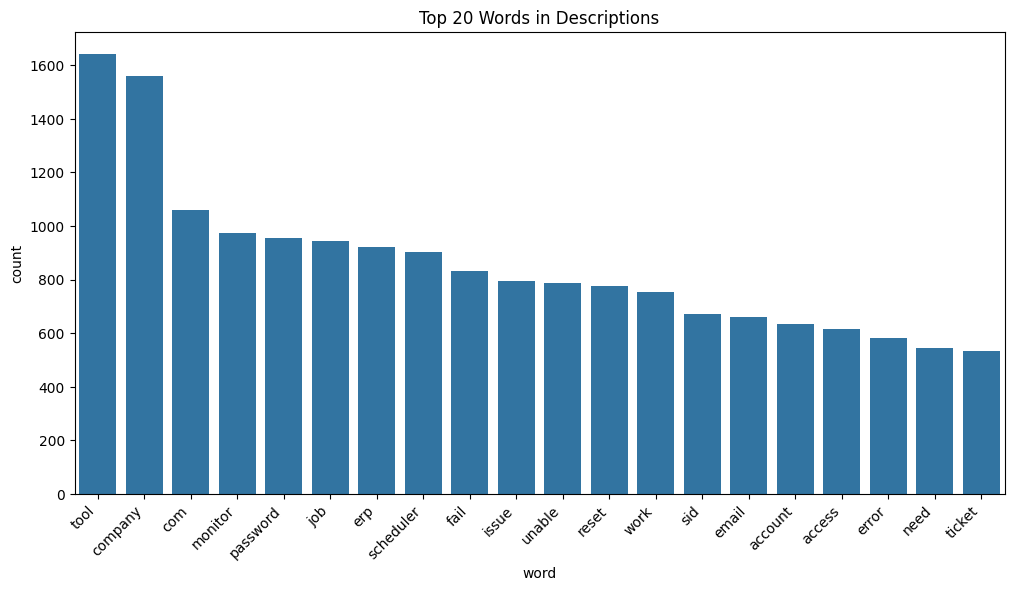

In [ ]:
all_descriptions = ' '.join(df1_final['description'].tolist())
words = all_descriptions.split()
word_counts = Counter(words)
top_20_words = word_counts.most_common(20)

top_words_df = pd.DataFrame(top_20_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words_df)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Descriptions')
plt.show()


In [ ]:
from wordcloud import WordCloud

In [ ]:
def top_words(group):
  word_counts = Counter()
  for tokens in group['description']:
    word_counts.update(tokens.split())
  return [word for word, count in word_counts.most_common(10)]

top_words_df = df1_final.groupby('assignment_group').apply(top_words).reset_index(name='top_words')
top_words_df

,assignment_group,top_words
0,GRP_0,"[password, erp, unable, reset, account, issue,..."
1,GRP_10,"[tool, company, job, com, scheduler, monitor, ..."
2,GRP_12,"[hostname, server, access, drive, disk, file, ..."
3,GRP_13,"[tool, order, inwarehouse, erp, customer, issu..."
4,GRP_14,"[hostname, erp, server, sid, error, issue, pro..."
5,GRP_19,"[laptop, work, issue, unable, system, need, pc..."
6,GRP_2,"[access, sid, system, erp, need, ticket, tool,..."
7,GRP_24,"[problem, setup, new, ws, ewew, computer, defe..."
8,GRP_25,"[tool, engineering, eu, error, system, work, i..."
9,GRP_3,"[need, pc, issue, work, laptop, computer, conn..."


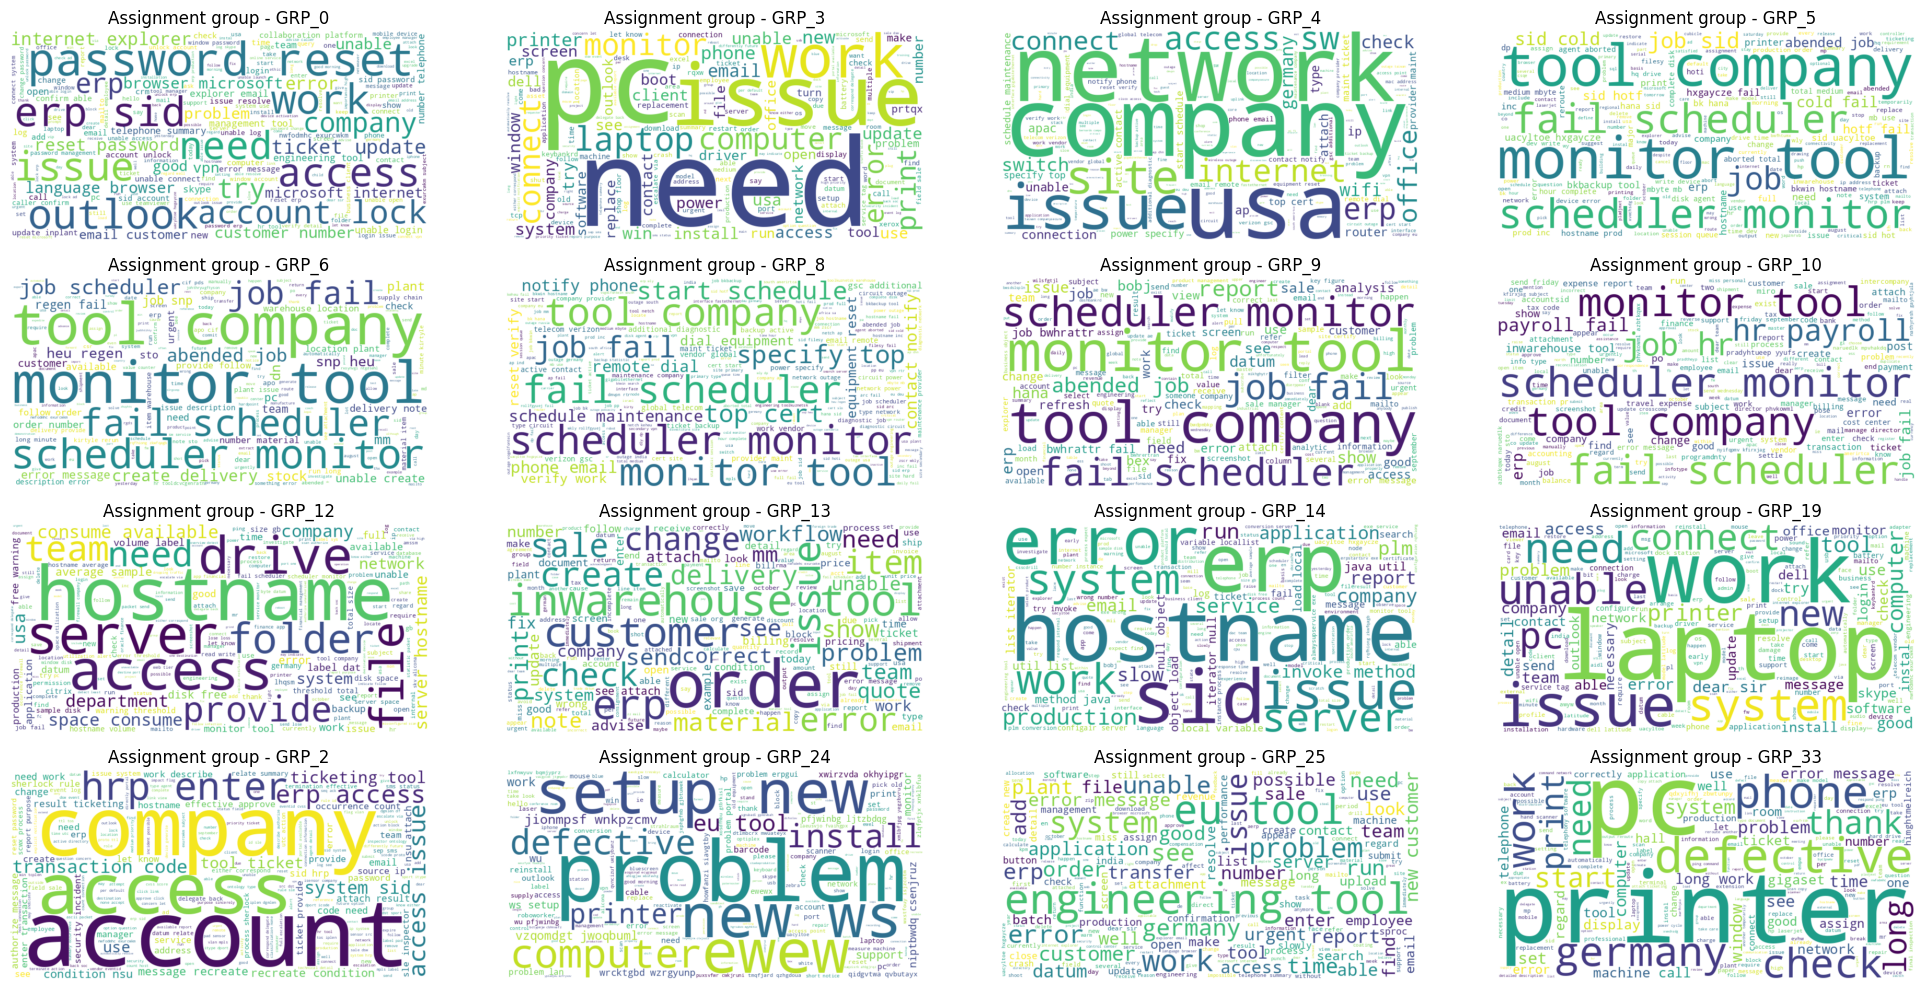

In [ ]:
groups = df1_final['assignment_group'].unique()

plt.figure(figsize=(20, 10))

for i, group in enumerate(groups):
  df_group = df1_final[df1_final['assignment_group'] == group]
  # Join all descriptions in the group into a single string
  text = ' '.join(df_group['description'].tolist())
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  # Pass the combined string

  plt.subplot((len(groups) + 3) // 4, 4, i + 1)
  plt.title(f'Assignment group - {group}')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

plt.tight_layout()
plt.show()

# Feature Transformation

In [ ]:
with open('df1_final.pickle', 'wb') as f:
  pickle.dump(df1_final, f)

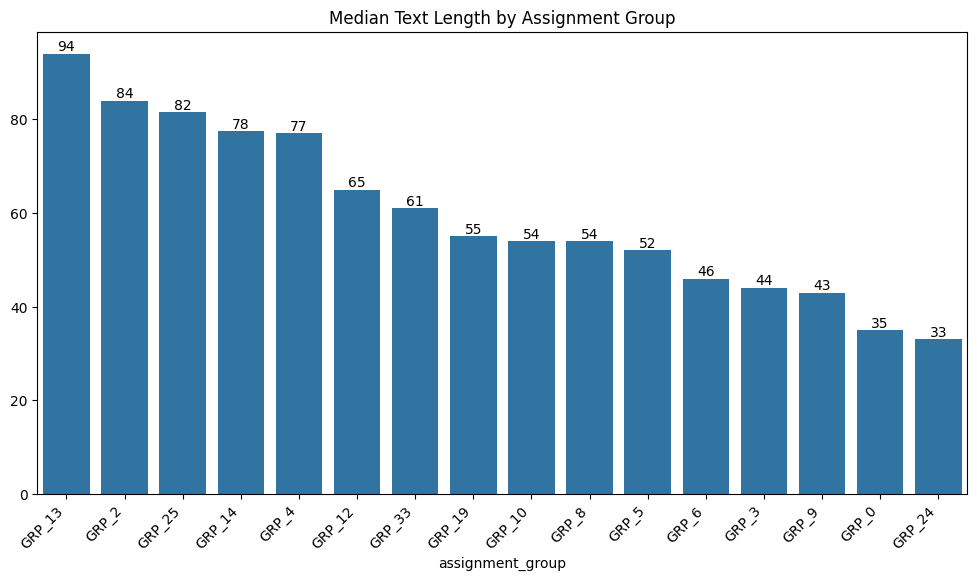

In [ ]:
df1_final['text_length'] = df1_final['description'].apply(len)
median_text_length = df1_final.groupby('assignment_group')['text_length'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=median_text_length.index, y=median_text_length.values)
plt.xticks(rotation=45, ha='right')
plt.title('Median Text Length by Assignment Group')

for i, v in enumerate(median_text_length.values):
  ax.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.show()


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from imblearn.over_sampling import RandomOverSampler
import time

In [6]:
with open('df_final.pickle', 'rb') as f:
  df1_final = pickle.load(f)

In [3]:
def calculate_tfidf(data):
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(data)
  return tfidf_matrix

In [7]:
X = calculate_tfidf(df1_final['description'])
y = df1_final['assignment_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify = y)

In [ ]:
train_data = pd.DataFrame(X_train.toarray())
train_data['assignment_group'] = y_train.values

test_data = pd.DataFrame(X_test.toarray())
test_data['assignment_group'] = y_test.values

with open('train_data.pickle', 'wb') as f:
  pickle.dump(train_data, f)

with open('test_data.pickle', 'wb') as f:
  pickle.dump(test_data, f)

In [8]:
def train_and_evaluate(X, y, model,model_name):
  results = []
  model_name = model_name
  model = model

  # Split Train data as train and validation sets
  X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42,stratify = y)

  # Handle class imbalance using RandomOverSampler
  oversampler = RandomOverSampler(random_state=42)

  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.toarray(), y_train)

  start_time = time.time()
  with tqdm(total=1, desc="Training Model") as pbar:
    model.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)
  pred = model.predict(X_eval)
  accuracy = accuracy_score(y_eval, pred)
  precision = precision_score(y_eval, pred, average='weighted')
  recall = recall_score(y_eval, pred, average='weighted')
  f1 = f1_score(y_eval, pred, average='weighted')
  end_time = time.time()

  results.append([model_name, accuracy, precision, recall, f1, end_time - start_time])

  df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score','Training Time(in seconds)'])
  print(classification_report(y_eval, pred))
  return df_results


In [ ]:
model_NB = MultinomialNB()

df1_output_NB = train_and_evaluate(X_train, y_train, model_NB,'MultinomialNB')

Training Model: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

              precision    recall  f1-score   support

       GRP_0       0.94      0.73      0.82       708
      GRP_10       0.71      0.60      0.65        25
      GRP_12       0.60      0.74      0.66        46
      GRP_13       0.42      0.85      0.56        26
      GRP_14       0.35      0.62      0.45        21
      GRP_19       0.25      0.41      0.31        39
       GRP_2       0.47      0.65      0.54        43
      GRP_24       0.81      0.85      0.83        52
      GRP_25       0.38      0.67      0.48        21
       GRP_3       0.29      0.58      0.39        36
      GRP_33       0.38      0.63      0.47        19
       GRP_4       0.21      0.50      0.30        18
       GRP_5       0.41      0.70      0.52        23
       GRP_6       0.74      0.42      0.54        33
       GRP_8       0.91      0.34      0.49       116
       GRP_9       0.35      0.72      0.47        46

    accuracy                           0.67      1272
   macro avg       0.51   

In [ ]:
df1_output_NB

,Model,Accuracy,Precision,Recall,F1_Score,Training Time(in seconds)
0,MultinomialNB,0.665094,0.774991,0.665094,0.689727,0.961696


In [ ]:
model_OVOLR = OneVsOneClassifier(LogisticRegression(max_iter=1000))

df1_output_OVOLR = train_and_evaluate(X_train, y_train, model_OVOLR,'OneVsOne_LogisticRegression')
print(df1_output_OVOLR)

Training Model: 100%|██████████| 1/1 [02:18<00:00, 138.11s/it]

              precision    recall  f1-score   support

       GRP_0       0.91      0.81      0.86       708
      GRP_10       0.76      0.64      0.70        25
      GRP_12       0.69      0.80      0.74        46
      GRP_13       0.61      0.73      0.67        26
      GRP_14       0.52      0.52      0.52        21
      GRP_19       0.29      0.46      0.35        39
       GRP_2       0.50      0.65      0.57        43
      GRP_24       0.79      0.85      0.81        52
      GRP_25       0.45      0.62      0.52        21
       GRP_3       0.35      0.61      0.45        36
      GRP_33       0.58      0.58      0.58        19
       GRP_4       0.23      0.28      0.25        18
       GRP_5       0.48      0.61      0.54        23
       GRP_6       0.82      0.42      0.56        33
       GRP_8       0.88      0.45      0.59       116
       GRP_9       0.37      0.78      0.50        46

    accuracy                           0.72      1272
   macro avg       0.58   

In [ ]:
model_RF = RandomForestClassifier()
df1_output_RF = train_and_evaluate(X_train, y_train, model_RF,'RandomForestClassifier')
df1_output_RF

Training Model: 100%|██████████| 1/1 [01:26<00:00, 86.55s/it]

              precision    recall  f1-score   support

       GRP_0       0.79      0.94      0.86       708
      GRP_10       0.90      0.36      0.51        25
      GRP_12       0.64      0.59      0.61        46
      GRP_13       0.69      0.42      0.52        26
      GRP_14       0.86      0.29      0.43        21
      GRP_19       0.50      0.26      0.34        39
       GRP_2       0.74      0.40      0.52        43
      GRP_24       0.81      0.85      0.83        52
      GRP_25       0.62      0.48      0.54        21
       GRP_3       0.43      0.28      0.34        36
      GRP_33       0.57      0.21      0.31        19
       GRP_4       0.14      0.06      0.08        18
       GRP_5       0.54      0.61      0.57        23
       GRP_6       0.93      0.39      0.55        33
       GRP_8       0.87      0.47      0.61       116
       GRP_9       0.35      0.72      0.47        46

    accuracy                           0.73      1272
   macro avg       0.65   

,Model,Accuracy,Precision,Recall,F1_Score,Training Time(in seconds)
0,RandomForestClassifier,0.732704,0.73951,0.732704,0.711141,86.664425


In [ ]:
df_all_models_tfidf = pd.concat([df1_output_NB,df1_output_OVOLR,df1_output_RF], ignore_index=True)
df_all_models_tfidf

,Model,Accuracy,Precision,Recall,F1_Score,Training Time(in seconds)
0,MultinomialNB,0.665094,0.774991,0.665094,0.689727,0.961696
1,OneVsOne_LogisticRegression,0.720912,0.776879,0.720912,0.734025,138.231434
2,RandomForestClassifier,0.732704,0.739510,0.732704,0.711141,86.664425


In [ ]:
#from sklearn.svm import SVC

#model_SVC = SVC(probability=True)
#df1_output_SVC = train_and_evaluate(X_train, y_train, model_SVC,'SVC')
#df1_output_SVC

Training Model:   0%|          | 0/1 [00:00<?, ?it/s]

SVC is taking more time to train. More than 32 minutes

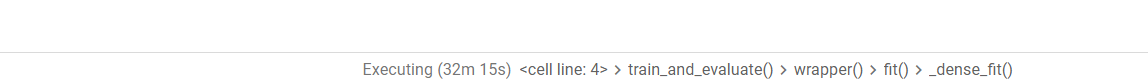

Let's check performance of model_OVOLR model on the unseen data(test data)

In [ ]:
with open('test_data.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
X_test = test_data.drop(['assignment_group'],axis = 1).values.copy()
y_test = test_data['assignment_group']
X_test = csr_matrix(X_test)

pred = model_OVOLR.predict(X_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

In [ ]:
print('accuracy', accuracy)
print('precision',precision)
print('recall', recall)
print('f1_score',f1)

accuracy 0.7241867043847242
precision 0.7816435841915745
recall 0.7241867043847242
f1_score 0.7369271565019639


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       GRP_0       0.90      0.81      0.86       394
      GRP_10       1.00      0.57      0.73        14
      GRP_12       0.56      0.69      0.62        26
      GRP_13       0.64      1.00      0.78        14
      GRP_14       0.64      0.75      0.69        12
      GRP_19       0.30      0.62      0.40        21
       GRP_2       0.41      0.58      0.48        24
      GRP_24       0.92      0.86      0.89        28
      GRP_25       0.62      0.67      0.64        12
       GRP_3       0.27      0.35      0.30        20
      GRP_33       0.73      0.73      0.73        11
       GRP_4       0.33      0.30      0.32        10
       GRP_5       0.50      0.54      0.52        13
       GRP_6       0.62      0.28      0.38        18
       GRP_8       0.89      0.49      0.63        65
       GRP_9       0.38      0.84      0.53        25

    accuracy                           0.72       707
   macro avg       0.61   

Applying PCA technique on the data and SVC model

In [9]:
from sklearn.decomposition import PCA

def train_and_evaluate(X, y, model,model_name):
  results = []
  model_name = model_name
  model = model

  X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42,stratify = y)

  oversampler = RandomOverSampler(random_state=42)

  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.toarray(), y_train)

  # Applying PCA
  pca = PCA(n_components=0.95)  # Keep 95% of variance
  X_train_resampled = pca.fit_transform(X_train_resampled)
  X_eval = pca.transform(X_eval.toarray())

  start_time = time.time()
  with tqdm(total=1, desc="Training Model") as pbar:
    model.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)
  pred = model.predict(X_eval)
  accuracy = accuracy_score(y_eval, pred)
  precision = precision_score(y_eval, pred, average='weighted')
  recall = recall_score(y_eval, pred, average='weighted')
  f1 = f1_score(y_eval, pred, average='weighted')
  end_time = time.time()

  results.append([model_name, accuracy, precision, recall, f1, end_time - start_time])

  df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score','Training Time(in seconds)'])
  print(classification_report(y_eval, pred))
  return df_results


In [15]:
from sklearn.decomposition import PCA

def train_and_evaluate(X, y, model,model_name):
  results = []
  model_name = model_name
  model = model

  X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42,stratify = y)

  oversampler = RandomOverSampler(random_state=42)

  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.toarray(), y_train)

  # Applying PCA
  pca = PCA(n_components=0.95)  # Keep 95% of variance
  X_train_resampled = pca.fit_transform(X_train_resampled)
  X_eval = pca.transform(X_eval.toarray())

  print("feature count after performing PCA",X_train_resampled.shape)

  start_time = time.time()
  with tqdm(total=1, desc="Training Model") as pbar:
    model.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)
  pred = model.predict(X_eval)
  accuracy = accuracy_score(y_eval, pred)
  precision = precision_score(y_eval, pred, average='weighted')
  recall = recall_score(y_eval, pred, average='weighted')
  f1 = f1_score(y_eval, pred, average='weighted')
  end_time = time.time()

  results.append([model_name, accuracy, precision, recall, f1, end_time - start_time])

  df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score','Training Time(in seconds)'])
  print(classification_report(y_eval, pred))
  return df_results


In [16]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

model_SVC = OneVsOneClassifier(SVC(probability=True))
df1_output_SVC = train_and_evaluate(X_train, y_train, model_SVC,'SVC_OVO')
print(df1_output_SVC)

feature count after performing PCA (45312, 913)


Training Model: 100%|██████████| 1/1 [14:35<00:00, 875.80s/it]


              precision    recall  f1-score   support

       GRP_0       0.74      0.95      0.83       708
      GRP_10       0.91      0.40      0.56        25
      GRP_12       0.71      0.48      0.57        46
      GRP_13       0.80      0.15      0.26        26
      GRP_14       0.62      0.24      0.34        21
      GRP_19       0.44      0.18      0.25        39
       GRP_2       0.74      0.47      0.57        43
      GRP_24       0.87      0.75      0.80        52
      GRP_25       0.44      0.19      0.27        21
       GRP_3       0.33      0.08      0.13        36
      GRP_33       0.60      0.16      0.25        19
       GRP_4       0.00      0.00      0.00        18
       GRP_5       0.56      0.61      0.58        23
       GRP_6       0.93      0.39      0.55        33
       GRP_8       0.86      0.53      0.65       116
       GRP_9       0.34      0.70      0.46        46

    accuracy                           0.71      1272
   macro avg       0.62   

In [18]:
df1_output_SVC

,Model,Accuracy,Precision,Recall,F1_Score,Training Time(in seconds)
0,SVC_OVO,0.713836,0.70889,0.713836,0.679455,965.138031


In [19]:
X_train.shape

(6359, 3804)